# Web Scraping Video Game Scores From MetaCritic

In [3]:
import requests #using requests models 
import bs4 #beautiful soup for traversing html 
import re #regular expressions 
import pandas as pd #pandas to hold data

In [4]:
def requestPage(url,userAgent): 
    '''
    This function requests a session with metacritic 
    -input: 
        url: a url for the page you are trying to request. 
        userAgent: the user who is trying to access the page 
        
    -output: the html of the requested web page in lxml format
    '''
    s = requests.Session()
    headers = {'User-Agent': userAgent}
    r = s.get(url,headers=headers)
    soup = bs4.BeautifulSoup(r.content, 'lxml') 
    return soup

In [5]:
def fetch(page): 
    tree = page.find_all('tr',class_='alt')
    # year: 
    year = [tree[item].find('td',class_='year').text for item in range(len(tree))]
    # user scores: 
    regexUserScore = re.compile('data textscore textscore_.')
    userscores = [tree[item].find('span',class_= regexUserScore).text for item in range(len(tree))]
    # meta scores: 
    regexMetaScore = re.compile('metascore_w small game.')
    metascores= [tree[item].find('span',class_= regexMetaScore).text for item in range(len(tree))]
    
    return year, userscores, metascores


In [6]:
def main(url): 
    flatten = lambda l: [item for sublist in l for item in sublist]
    yearColumn = []
    userColumn = []
    metaColumn = [] 
    for index in range(0,6): 
        page = requestPage(url + '?page=' + str(index),'Mozilla/5.0')
        year,user,meta = fetch(page)
        yearColumn.append(year)
        userColumn.append(user)
        metaColumn.append(meta)
    yearColumn = flatten(yearColumn)
    userColumn = flatten(userColumn)
    metaColumn = flatten(metaColumn)
    table = pd.DataFrame(
    {'date': yearColumn,
     'user': userColumn,
     'meta': metaColumn
    })
    return table

In [8]:
table = main('http://www.metacritic.com/company/bioware')
table['date'] = table['date'].str.replace('\n\s+', '')
table['year'] = table['date'].str.replace('.+,', '')

In [9]:
table

,date,meta,user,year
0,"Mar 21, 2017",76,4.9,2017
1,"Oct 27, 2015",tbd,7.4,2015
2,"Oct 6, 2015",tbd,6.0,2015
3,"Sep 9, 2015",tbd,7.4,2015
4,"Aug 11, 2015",66,5.5,2015
5,"Aug 11, 2015",tbd,5.6,2015
6,"May 26, 2015",tbd,6.6,2015
7,"Mar 24, 2015",74,5.7,2015
8,"Nov 18, 2014",tbd,5.1,2014
9,"Nov 18, 2014",85,7.0,2014


In [8]:
userGraph = table.query('user != "tbd"')
userGraph['user'] = userGraph['user'].astype('float')

/Users/ericbuehler/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
time = userGraph.groupby('year').agg({'user': 'mean'})
time = time.reset_index(drop=False)
time

,year,user
0,1999,8.300000
1,2000,9.200000
2,2001,8.800000
3,2003,8.200000
4,2005,8.300000
5,2007,8.700000
6,2008,6.800000
7,2009,7.125000
8,2010,6.650000
9,2011,4.840000


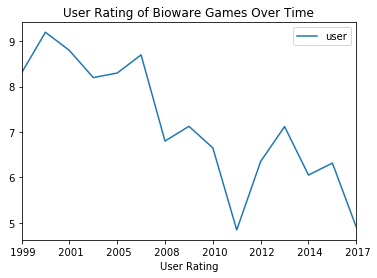

In [10]:
import matplotlib.pyplot as plt
a = time.plot(x='year', y='user')
a.set_xlabel('year')
a.set_xlabel('User Rating')
a.set_title('User Rating of Bioware Games Over Time')
plt.show()


In [18]:
metaGraph = table.query('meta != "tbd"')
metaGraph['meta'] = metaGraph['meta'].astype('float')


/Users/ericbuehler/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


numpy.float64

In [19]:
time2 = metaGraph.groupby('year').agg({'meta': 'mean'})
time2 = time2.reset_index(drop=False)
time2

,year,meta
0,2000,95.000000
1,2001,88.000000
2,2003,81.000000
3,2005,89.000000
4,2007,91.000000
5,2008,74.000000
6,2009,87.000000
7,2010,72.900000
8,2011,73.857143
9,2012,77.750000


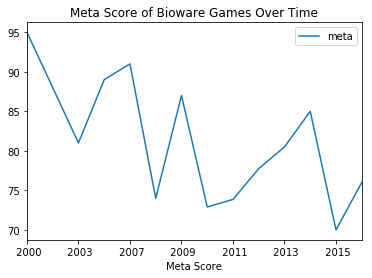

In [23]:
import matplotlib.pyplot as plt
a = time2.plot(x='year', y='meta')
a.set_xlabel('year')
a.set_xlabel('Meta Score')
a.set_title('Meta Score of Bioware Games Over Time')
plt.show()